In [111]:
%matplotlib inline
from scipy.stats import binom, norm
from numpy import linspace
from matplotlib.pyplot import figure, savefig, ylim, gca, plot, fill_between
from matplotlib import rc
from seaborn import barplot
rc('text', usetex=True)
rc('font', family='serif', serif='Times', size=20)

In [115]:
def f(n= 20, mu0=75, xbar=78, sigma=9.5, tail='upper'):
    
    sigma = round (sigma/n**(1/2), 1)
    x   = linspace( mu0 - 4*sigma, mu0 + 4*sigma , 800 )
    
    pval = 1 - norm.cdf(  xbar, mu0, sigma)
 
    def fill(w1,w2, color='red', x=x, sigma=sigma, mu=mu0):
        where = [ w1[i] or w2[i] for i in range(len(w1)) ]
        fill_between(x, norm.pdf(x,mu,sigma), where=where, color=color)
        return None
   
    x1 = [ x[i] <= 2 * mu0-xbar for i in range(len(x)) ]    
    x3 = [ x[i] >= xbar for i in range(len(x)) ]
    x2 = [ not (x1[i] or x3[i])  for i in range(len(x)) ]
              
    figure( figsize=(13,5) )
    
    if ( tail=='upper' or tail=='two'):
        plot([xbar]*2, [0,1], linestyle='--', color='black')
        gca().annotate(r'$\bar x = {}$'.format(xbar), 
                    xy=(xbar,0.205), 
                    color='red',
                    horizontalalignment='center', 
                    annotation_clip=False)         
        
    if ( tail=='lower' or tail=='two' ):
        plot([2*mu0-xbar]*2, [0,1], linestyle='--', color='black')
        gca().annotate(r'$2\mu_0-\bar x = {}$'.format(2*mu0-xbar), 
                    xy=(2*mu0-xbar-0.5,0.205), 
                    color='red',
                    horizontalalignment='center', 
                    annotation_clip=False)          
        
    gca().annotate('$n={}$\n $\mu_0=\mu_0={}$\n $\sigma=\sigma_0/\sqrt n={}$'.format(n,mu0, sigma), 
                    xy=(0.02, 0.65), 
                    linespacing=1.8, 
                    xycoords='axes fraction' )
    gca().annotate('p-value:'.format(xbar,pval), 
                    xy=(0.02,0.48), 
                    color='red', 
                    horizontalalignment='left', 
                    xycoords='axes fraction') 
    if ( tail=='upper' ):
        gca().annotate(r'$P(\bar X>{}\ |\ H_0)\ =\ {:.2f}$'.format(xbar,pval), 
                    xy=(0.02,0.35), 
                    color='red', 
                    horizontalalignment='left', 
                    xycoords='axes fraction')     
    if ( tail=='two' ):
        gca().annotate(r'$P(\bar X>{}\ |\ H_0)\ +$'.format(xbar), 
                    xy=(0.02,0.35), 
                    color='red', 
                    horizontalalignment='left', 
                    xycoords='axes fraction') 
        gca().annotate(r'$P(\bar X<{}\ |\ H_0)\ =\ {:.2f}$'.format(2*mu0-xbar,2*pval), 
                    xy=(0.02,0.23), 
                    color='red', 
                    horizontalalignment='left', 
                    xycoords='axes fraction') 
 

    
    plot(x, norm.pdf(x,mu0,sigma), color='black', lw=2 )
    
    if (tail=='lower'): fill(x1, x1, mu=mu0)
    if (tail=='upper'): fill(x3, x3, mu=mu0)
    if (tail=='two'): fill(x1, x3, mu=mu0)
    return None

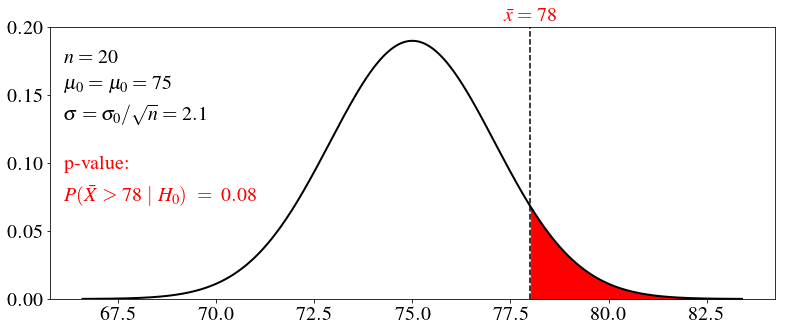

In [116]:
f(n=20, mu0=75, sigma=9.5, tail='upper')
ylim(0, 0.20)
savefig( 'Z-test-p-val_01.pdf',bbox_inches='tight' )

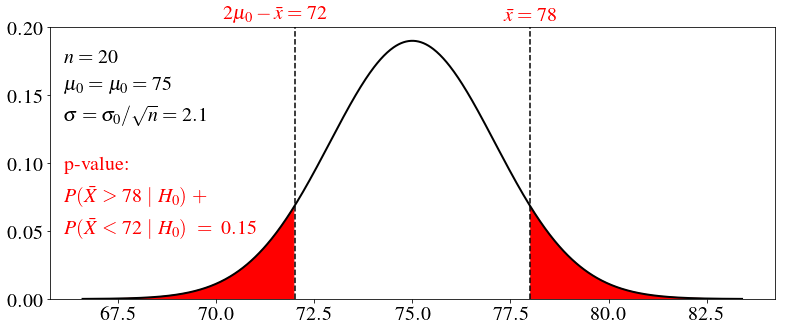

In [117]:
f(n=20, mu0=75, sigma=9.5, tail='two')
ylim(0, 0.20)
savefig( 'Z-test-p-val_02.pdf',bbox_inches='tight' )